# Generar voz con IA

## INGLÉS

In [1]:
# script para grabar voz 
import tortoise.api as api
import tortoise.utils as utils
import os
from scipy.io.wavfile import write
# Ruta a los clips de voz
clips_paths = [
    "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_1.wav",
    "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_2.wav",
    "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_3.wav",
    "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_4.wav"
]

reference_clips = [utils.audio.load_audio(p, 22050) for p in clips_paths]
tts = api.TextToSpeech()
pcm_audio = tts.tts_with_preset("Hola, soy Pilar Arias y tengo 23 años. Me gusta el café y el agua", voice_samples=reference_clips, preset='fast')
# Guardar el audio generado
output_path = "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/output.wav"

ModuleNotFoundError: No module named 'tortoise'

In [ ]:
# output_path = "voz_clonada.wav"
write(output_path, 24000, pcm_audio.squeeze().cpu().numpy())
print(f"✅ Audio guardado como {output_path}")


✅ Audio guardado como C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/output.wav


## ESPAÑOL

In [3]:
import os
import torch
import torchaudio
import random
from TTS.api import TTS
from torchaudio.transforms import MelSpectrogram, MFCC
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from pathlib import Path


In [ ]:
import torch.serialization
from TTS.tts.configs.xtts_config import XttsConfig

# Añadir XttsConfig como clase segura
torch.serialization.add_safe_globals({"TTS.tts.configs.xtts_config.XttsConfig": XttsConfig})


https://chatgpt.com/share/68835622-2248-8001-9e16-a1eb0cebf76f

In [6]:

# ============================
# 1. Generar audios falsos con Coqui XTTS
# ============================


audio_dir = Path("Audios_48samplerate")
speaker_wavs = list(audio_dir.rglob("*.wav"))

# todos los audios dentro de Audios_48samplerate

tts = TTS(model_name="tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)

texts_fake = [
    "Hola, soy del banco, Necesitamos verificar una transacción sospechosa.",
    "Detectamos un movimiento extraño en tu cuenta, Por favor, confirma tu identidad.",
    "Se ha intentado acceder a tu cuenta desde otro dispositivo, Activa tu token.",
    "Necesitamos tu número de tarjeta para validar el pago.",
    "Buenas tardes, hemos detectado un fallo de seguridad en tu sistema.",
    "Buenas, le llamamos del banco por un posible fraude en su cuenta.",
    "Para evitar el bloqueo de su tarjeta, necesitamos el código CVV.",
    "Su cuenta ha sido comprometida, Necesitamos verificar sus credenciales.",
    "Hola, soy del servicio de verificación, Necesitamos validar sus datos personales.",
    "Hemos detectado una compra sospechosa en su cuenta de Amazon.",
    "Debe validar su identidad para evitar el cierre de su cuenta.",
    "Llamamos del servicio técnico, Su ordenador está infectado.",
    "Necesitamos acceso remoto para reparar un fallo en su sistema.",
    "Tiene un reembolso pendiente, Facilite su número de cuenta.",
    "Para continuar usando su app, confirme los datos por SMS.",
    "La policía está investigando su cuenta, Necesitamos colaboración urgente.",
    "Se ha bloqueado su acceso online por motivos de seguridad.",
    "Su dispositivo está en riesgo, Debe instalar una herramienta oficial.",
    "Para evitar multas, actualice su información fiscal ahora.",
    "Ha ganado un premio, Envíe sus datos para recibirlo.",
    "Le llamamos de la Seguridad Social, Faltan datos en su expediente.",
    "Confirmamos que su tarjeta ha sido clonada, Necesitamos los datos actuales.",
    "Hola, ha recibido una sanción, Evítela accediendo al siguiente enlace.",
    "Detectamos actividad irregular, Necesitamos comprobar el último movimiento.",
    "Hay un cargo sospechoso, Para anularlo, indique su número de cuenta."
] + [
    "Hola, ¿vas a venir hoy a clase?",
    "Estoy terminando el informe. Te lo paso esta tarde.",
    "Acuérdate de comprar leche.",
    "Voy a salir a correr un rato.",
    "Nos vemos en el cine a las 7.",
    "¿Te apetece tomar algo esta tarde?",
    "Voy a hacer la compra, ¿necesitas algo?",
    "He terminado el informe, te lo envío en un rato.",
    "¿Te viene bien si pasamos por tu casa a las seis?",
    "No te olvides de llevar el paraguas.",
    "Mañana tengo reunión temprano, no podré ir al gimnasio.",
    "Estamos organizando una cena el viernes. ¿Te apuntas?",
    "¿Puedes recoger el paquete de la oficina de correos?",
    "He dejado las llaves en la mesa del salón.",
    "El examen de mañana empieza a las 9 en punto.",
    "Voy a preparar algo de cenar, ¿quieres que te guarde?",
    "No me esperes despierto, llegaré tarde.",
    "¿Quieres que te mande las fotos del viaje?",
    "Recuerda que tenemos cita con el médico el jueves.",
    "Te escribo cuando llegue al trabajo.",
    "¿Vienes a la reunión o te conectas online?",
    "Acordamos vernos en la estación a las cinco.",
    "Lleva abrigo, está haciendo mucho frío.",
    "Salgo en diez minutos, te aviso al llegar.",
    "¿Te llamo cuando esté libre o prefieres que te escriba?"
]

output_dir = Path("fake_audios")
output_dir.mkdir(exist_ok=True)

for i, text in enumerate(texts_fake):
    wav = tts.tts(text, speaker_wav=speaker_wavs, language="es")
    torchaudio.save(str(output_dir / f"fake_{i:03}.wav"), torch.tensor([wav]), 24000)


 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts
 > Text splitted to sentences.
['Hola, soy del banco.', 'Necesitamos verificar una transacción sospechosa.']
 > Processing time: 19.49407434463501
 > Real-time factor: 3.1974852661509314
 > Text splitted to sentences.
['Detectamos un movimiento extraño en tu cuenta.', 'Por favor, confirma tu identidad.']
 > Processing time: 18.417658805847168
 > Real-time factor: 2.66559924824702
 > Text splitted to sentences.
['Se ha intentado acceder a tu cuenta desde otro dispositivo.', 'Activa tu token.']
 > Processing time: 17.601980924606323
 > Real-time factor: 2.222625065211938
 > Text splitted to sentences.
['Necesitamos tu número de tarjeta para validar el pago.']
 > Processing time: 10.84326171875
 > Real-time factor: 2.412945269845365
 > Text splitted to sentences.
['Buenas tardes, hemos detectado un fallo de seguridad en tu sistema.']
 > Processing time: 12.5693039894104
 > Real-time factor: 2.5173

# CLASIFICADOR VOCES MFCC + PYTORCH

In [1]:
# =============================================
# 2. Extraer MFCCs de audios reales y falsos
# =============================================
import librosa
import numpy as np
import soundfile as sf
import os
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=24000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc.mean(axis=1)

data = []
labels = []

# Audios reales
real_dir = "Audios_48samplerate/Normal"
fake_dir = "fake_audios"
for file in os.listdir(real_dir):
    if file.endswith(".wav"):
        features = extract_mfcc(os.path.join(real_dir, file))
        data.append(features)
        labels.append(0)  # 0 = real

# Audios falsos
for file in os.listdir(fake_dir):
    if file.endswith(".wav"):
        features = extract_mfcc(os.path.join("fake_audios", file))
        data.append(features)
        labels.append(1)  # 1 = fake

X = np.array(data)
y = np.array(labels)

# =============================================
# 3. Clasificador con PyTorch
# =============================================
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Convertir a tensores con tipos correctos
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Dividir en train, validación y test
X_temp, X_test, y_temp, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
# 0.6 train / 0.2 val / 0.2 test

# Datasets y dataloaders
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)
test_ds = TensorDataset(X_test, y_test)

train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=8)
test_dl = DataLoader(test_ds, batch_size=8)

# Modelo
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)

# Entrenamiento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Classifier().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(40):
    model.train()
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        opt.step()
        opt.zero_grad()

    # Validación
    model.eval()
    acc = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            acc += (pred.argmax(1) == yb).sum().item()
            total += yb.size(0)
    print(f"📊 Epoch {epoch+1:02d} - Validación: Accuracy = {acc/total:.2%}")

# Evaluación en test
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device)
        pred = model(xb).argmax(1).cpu()
        all_preds.extend(pred.numpy())
        all_labels.extend(yb.numpy())

print("\n🧪 Resultados en Test:")
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(
    all_labels,
    all_preds,
    labels=[0, 1],
    target_names=["Real", "Falsa"],
    zero_division=0  # evita errores si una clase no está presente
))

print("Matriz de confusión:")
print(confusion_matrix(all_labels, all_preds))


c:\venv\IA\lib\site-packages\scipy\__init__.py:145: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 2.2.6)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\pilar\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\pilar\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  F

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [12]:
from collections import Counter

print("Distribución original:", Counter(y))


Distribución original: Counter({1: 50, 0: 40})


# CLASIFICADOR VOCES PRE-ENTRENADOS

## Detecta todo como fake :(

In [1]:
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor
import torchaudio
import torch
from torch.nn.functional import softmax
# Carga del modelo y extractor

##################################33 TODO FAKE
# model = AutoModelForAudioClassification.from_pretrained("mo-thecreator/Deepfake-audio-detection")
# feature_extractor = AutoFeatureExtractor.from_pretrained("mo-thecreator/Deepfake-audio-detection")


##################################33 TODO FAKE
model = AutoModelForAudioClassification.from_pretrained("langulor/deepfake-voice-spanish")
feature_extractor = AutoFeatureExtractor.from_pretrained("langulor/deepfake-voice-spanish")



# Cargar un archivo de audio (.wav, 16kHz)
waveform, sample_rate = torchaudio.load("Audios_48samplerate/Normal/sample_1_20250721_173507.wav")
waveform = waveform.mean(dim=0)  # Convertir a mono si está en estéreo

# Resamplear si es necesario
if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)
    sample_rate = 16000

# Extraer características
inputs = feature_extractor(waveform.numpy(), sampling_rate=sample_rate, return_tensors="pt")

classes = model.config.id2label
print(f"Clases: {classes}")
# Clasificación
with torch.no_grad(): #evaluar el modelo sin calcular gradientes
    model.eval()  # Poner el modelo en modo evaluación
    logits = model(**inputs).logits
    probs = softmax(logits, dim=0)
    predicted_class = torch.argmax(logits).item()

# Interpretar resultado
if predicted_class == 0:
    print("🔊 El audio parece **real**.")
else:
    print("⚠️ El audio parece **deepfake**.")


print(probs)

c:\venv\IA\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\venv\IA\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Clases: {0: 'LABEL_0', 1: 'LABEL_1'}
⚠️ El audio parece **deepfake**.
tensor([[1., 1.]])


In [ ]:
# cargamos audio output.wav
waveform, sample_rate = torchaudio.load("C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/output.wav")
waveform = waveform.mean(dim=0)  # Convertir a mono si está en estéreo
print(sample_rate)

24000


# AUDIO TO TEXT

In [2]:
from huggingsound import SpeechRecognitionModel
import os
from pathlib import Path
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-spanish")
# audio_paths = [r"fake_audios\fake_000.wav", r"Audios_48samplerate\Normal\sample_4_20250721_173627.wav"]

# all audios in Audios_48samplerate/Normal
audio_paths = [str(p) for p in Path("Audios_48samplerate/Normal").rglob("*.wav")]

transcriptions = model.transcribe(audio_paths)



07/31/2025 18:23:36 - INFO - huggingsound.speech_recognition.model - Loading model...


c:\venv\IA\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 40/40 [04:10<00:00,  6.26s/it]


In [3]:
# get transcriptions
for i, transcription in enumerate(transcriptions):
    print(f"Transcripción {i+1}:    {transcription['transcription']}")

Transcripción 1:    hola su idiogimnasio el que estab apuntado queríamos saber si sigue interesado en mantener su suscripción o prefiere pausarla durante el mes de vacaciones
Transcripción 2:    buenas tardes le llamamos la empresa de seguros para recordarle que su póliza está próxima a vencer le interesa renovarla con las mismas condiciones
Transcripción 3:    hola shoy laura del centro veterinario sólo quería conferconfirmar si va atraer a su gato a la revisión anual que teníamos programada para mañana a las diez
Transcripción 4:    disculpe llamo de la tienda online su pellído está listo para ser enviado pero necesitamos confirmar la dirección de entrega antes de proceder con el envío
Transcripción 5:    buenas soy de la empresa de mudanzas mañana pasamos por su domicilio a las nueve  hay alguna indicación especial para acceder al portal o a la vivienda
Transcripción 6:    hosomos el centro cultural ha sido seleccionado para participar en un taller de escritura  podría confirmar su 

## La cosa ahora sería integrar esto en un audio que se está generando en vivo 

La siguiente celda de código cuenta con: 

- CHUNK_DURATION = 0.8 // latencia muy baja (~1 s) -> nos da el texto asap con el menor delay

- blocksize pequeño (blocksize=512)  el callback se activa rápido.

- Umbral de energía RMS (threshold_db = -40) para detectar si hay voz antes de transcribir // así ahorramos coste computacional

- Todo en memoria, sin escribir WAVs.



In [ ]:
import os
import time
import queue
import threading
import numpy as np
import sounddevice as sd
from transformers import pipeline

# -----------------------------
# 🔧 CONFIGURACIÓN DEL AUDIO
# -----------------------------
DEVICE_NAME = "CABLE Output (VB-Audio Virtual Cable)"
FS = 16000              # Wav2Vec2 requiere 16kHz
CHUNK_DURATION = 0.8    # Segundos por fragmento (baja latencia)
BLOCKSIZE = int(FS * CHUNK_DURATION)
ENERGY_THRESHOLD_DB = -40  # Umbral en decibelios para detección de voz

# Buscar índice del dispositivo
def buscar_dispositivo(nombre_dispositivo):
    for i, dev in enumerate(sd.query_devices()):
        if nombre_dispositivo.lower() in dev['name'].lower():
            return i
    raise ValueError(f"Dispositivo '{nombre_dispositivo}' no encontrado.")

try:
    dispositivo_idx = buscar_dispositivo(DEVICE_NAME)
    print(f"🎧 Usando dispositivo: {DEVICE_NAME} (índice {dispositivo_idx})")
except ValueError as e:
    print(e)
    exit()

# -----------------------------
# 🧠 CARGAR MODELO wav2vec2
# -----------------------------
print("🔄 Cargando modelo...")
asr_pipeline = pipeline(
    "automatic-speech-recognition",
    model="jonatasgrosman/wav2vec2-large-xlsr-53-spanish",
    device=0 if sd.query_devices(kind='input')['hostapi'] == 1 else -1  # GPU si disponible
)

# -----------------------------
# 🎙️ CAPTURA Y TRANSCRIPCIÓN
# -----------------------------
audio_queue = queue.Queue()

def audio_callback(indata, frames, time_info, status):
    if status:
        print(f"⚠️ Estado del audio: {status}")
    audio_queue.put(indata.copy())

def energia_rms_db(audio_array):
    # RMS -> log en dB
    rms = np.sqrt(np.mean(audio_array**2))
    if rms == 0:
        return -100
    return 20 * np.log10(rms)

def transcribir_en_vivo():
    print("🧠 Transcribiendo en tiempo real con buffer de texto...\n")
    buffer = np.empty((0, 1), dtype=np.float32)
    texto_acumulado = ""
    tiempo_ultimo_envio = time.time()

    while True:
        data = audio_queue.get()
        buffer = np.concatenate((buffer, data), axis=0)

        if len(buffer) >= BLOCKSIZE:
            chunk = buffer[:BLOCKSIZE]
            buffer = buffer[BLOCKSIZE:]

            audio_array = chunk.squeeze()
            energia_db = energia_rms_db(audio_array)

            if energia_db < ENERGY_THRESHOLD_DB:
                print(f"🔇 Fragmento descartado (RMS = {energia_db:.1f} dB)")
                continue

            try:
                result = asr_pipeline(audio_array)
                texto = result['text'].strip()

                # Filtro: solo añadir si tiene 3 o más palabras
                if len(texto.split()) >= 3:
                    texto_acumulado += " " + texto
                    print("🗣️", texto)

                # Enviar al clasificador si ha pasado suficiente tiempo o el buffer es largo
                if len(texto_acumulado.split()) >= 20 or (time.time() - tiempo_ultimo_envio) > 10:
                    if texto_acumulado:
                        print("\n🔎 Texto para clasificación:", texto_acumulado.strip())

                        texto_acumulado = ""
                        tiempo_ultimo_envio = time.time()

            except Exception as e:
                print(f"❌ Error de transcripción: {e}")

# -----------------------------
# 🔁 INICIAR STREAM Y HILO
# -----------------------------
stream = sd.InputStream(samplerate=FS, channels=1, dtype='float32',
                        callback=audio_callback, blocksize=512,
                        device=dispositivo_idx)
stream.start()

t = threading.Thread(target=transcribir_en_vivo, daemon=True)
t.start()

try:
    while True:
        time.sleep(0.1)
except KeyboardInterrupt:
    print("\n🛑 Transcripción detenida.")
    stream.stop()


Could not load the `decoder` for jonatasgrosman/wav2vec2-large-xlsr-53-spanish. Defaulting to raw CTC. Error: No module named 'kenlm'
Try to install `kenlm`: `pip install kenlm
Try to install `pyctcdecode`: `pip install pyctcdecode
c:\venv\IA\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pilar\.cache\huggingface\hub\models--skandavivek2--spam-classifier. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.mi

🗣️ eno en las censas
🗣️ ción de la batalla
🗣️ detalle y moder
🗣️ ledad y un país

📋 Texto final: eno en las censas ción de la batalla detalle y moder ledad y un país
⚠️ Clasificación: HAM (confianza 1.00)

🗣️ sajes sonoro rias
🗣️ listhacen de ca
🗣️ la batalla una e
🗣️ experiencia y no
🗣️ a nueva localizarci

📋 Texto final: sajes sonoro rias listhacen de ca la batalla una e experiencia y no a nueva localizarci
⚠️ Clasificación: HAM (confianza 1.00)

🗣️ ón valla de los mol
🗣️ da en kan chapca
🗣️ te permite proo
🗣️ ar nuevos avione

📋 Texto final: ón valla de los mol da en kan chapca te permite proo ar nuevos avione
⚠️ Clasificación: HAM (confianza 1.00)

🗣️ es en batallas tres
🗣️ los volcanes como
🗣️ ratisa en pece

📋 Texto final: es en batallas tres los volcanes como ratisa en pece
⚠️ Clasificación: HAM (confianza 1.00)

🗣️ soy del bank
🗣️ na transacción so
🛑 Proceso detenido.


Y aquí ahora probamos a meter un modelo clasificador de texto de scam (spam-classifier)

In [ ]:
import os, time, queue, threading, numpy as np, sounddevice as sd
from transformers import pipeline

# 🔧 Configuración
DEVICE_NAME = "CABLE Output (VB-Audio Virtual Cable)"
FS = 16000
CHUNK_DURATION = 0.8
BLOCKSIZE = int(FS * CHUNK_DURATION)
ENERGY_THRESHOLD_DB = -40

# Pipelines
asr = pipeline(
    "automatic-speech-recognition",
    model="jonatasgrosman/wav2vec2-large-xlsr-53-spanish",
    # device=0  # usa GPU si está disponible
)
classifier = pipeline(
    "text-classification",
    model="skandavivek2/spam-classifier"
)

# Funciones auxiliares
def buscar_dispositivo(nombre):
    for i, dev in enumerate(sd.query_devices()):
        if nombre.lower() in dev["name"].lower():
            return i
    raise ValueError(f"Dispositivo '{nombre}' no encontrado")
def energia_rms_db(audio):
    rms = np.sqrt(np.mean(audio**2))
    return -100 if rms == 0 else 20 * np.log10(rms)

# Inicialización
dispositivo_idx = buscar_dispositivo(DEVICE_NAME)
audio_q = queue.Queue()

def audio_callback(indata, frames, time_info, status):
    if status:
        print("⚠️", status)
    audio_q.put(indata.copy())

def transcribir_y_clasificar():
    buffer = np.empty((0, 1), dtype=np.float32)
    texto_acum = ""
    ult_envio = time.time()

    while True:
        data = audio_q.get()
        buffer = np.concatenate((buffer, data), axis=0)

        if len(buffer) >= BLOCKSIZE:
            chunk = buffer[:BLOCKSIZE]
            buffer = buffer[BLOCKSIZE:]
            audio_arr = chunk.squeeze()
            if energia_rms_db(audio_arr) < ENERGY_THRESHOLD_DB:
                continue

            result = asr(audio_arr)  # sin sampling_rate
            texto = result["text"].strip()
            if len(texto.split()) >= 3:
                texto_acum += " " + texto
                print("🗣️", texto)

            # Clasificar si hay suficiente texto o tiempo
            if len(texto_acum.split()) >= 15 or (time.time() - ult_envio) > 8:
                texto_final = texto_acum.strip()
                print("\n📋 Texto final:", texto_final)
                cls = classifier(texto_final)[0]
                label = cls["label"]
                score = cls["score"]
                print(f"⚠️ Clasificación: {label} (confianza {score:.2f})\n")
                texto_acum = ""
                ult_envio = time.time()

# Ejecutar stream y hilo
stream = sd.InputStream(samplerate=FS, channels=1, dtype='float32',
                        callback=audio_callback, blocksize=512,
                        device=dispositivo_idx)
stream.start()

t = threading.Thread(target=transcribir_y_clasificar, daemon=True)
t.start()

try:
    while True:
        time.sleep(0.1)
except KeyboardInterrupt:
    stream.stop()
    print("🛑 Proceso detenido.")


Las transcripciones se veían mal antes, porque se cortaban, una solución a esto es faster_whisper, así que vamos a probar a meterlo al modelo de clasificación, que no sé si quiera si se trata de un modelo en español, pero es simplemente por probar. Seguramente tengamos que hacer un modelo nosotros, porque he buscado pero no he encontrado.

In [3]:
import os, time, queue, threading, numpy as np, sounddevice as sd
from faster_whisper import WhisperModel
from transformers import pipeline
import re

# 🔧 Configuración
DEVICE_NAME = "CABLE Output (VB-Audio Virtual Cable)"
FS = 16000
CHUNK_DURATION = 2.0  # 2 s ofrece buen equilibrio fluidez/latencia
BLOCKSIZE = int(FS * CHUNK_DURATION)
ENERGY_THRESHOLD_DB = -40

# Funciones auxiliares
def buscar_dispositivo(nombre):
    for i, dev in enumerate(sd.query_devices()):
        if nombre.lower() in dev["name"].lower():
            return i
    raise ValueError(f"Dispositivo '{nombre}' no encontrado")

def energia_rms_db(audio):
    rms = np.sqrt(np.mean(audio**2))
    return -100 if rms == 0 else 20 * np.log10(rms)

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\bna\b', 'una', texto)
    texto = re.sub(r'\s+', ' ', texto)
    return texto.strip()

# Carga de modelos
print("🔄 Cargando Whisper (faster-whisper)...")
whisper_model = WhisperModel("base", compute_type="int8", device="cpu")
  # o "float16" si GPU

print("🔄 Cargando clasificador de spam...")
classifier = pipeline("text-classification", model="skandavivek2/spam-classifier")

# Inicialización del dispositivo
dispositivo_idx = buscar_dispositivo(DEVICE_NAME)
audio_queue = queue.Queue()

def audio_callback(indata, frames, time_info, status):
    if status:
        print("⚠️", status)
    audio_queue.put(indata.copy())

# Hilo: transcripción y clasificación
def transcribir_y_clasificar():
    buffer = np.empty((0, 1), dtype=np.float32)
    texto_acum = ""
    ult_envio = time.time()

    print("🧠 Iniciando transcripción en vivo con buffer...\n")
    while True:
        data = audio_queue.get()
        buffer = np.concatenate((buffer, data), axis=0)

        if len(buffer) >= BLOCKSIZE:
            chunk = buffer[:BLOCKSIZE]
            buffer = buffer[BLOCKSIZE:]
            audio_arr = chunk.squeeze()
            if energia_rms_db(audio_arr) < ENERGY_THRESHOLD_DB:
                continue

            # Transcribir con faster-whisper
            segments, _ = whisper_model.transcribe(audio_arr, language="es")
            texto_fragmento = " ".join(seg.text for seg in segments).strip()

            if not texto_fragmento:
                continue

            texto_fragmento = limpiar_texto(texto_fragmento)
            if len(texto_fragmento.split()) >= 3:
                texto_acum += " " + texto_fragmento
                print("🗣️", texto_fragmento)

            # Clasificar si hay suficiente contexto o tiempo
            if len(texto_acum.split()) >= 20 or (time.time() - ult_envio) > 10:
                texto_final = texto_acum.strip()
                print(f"\n📋 Texto para clasificar:\n{texto_final}\n")
                cls = classifier(texto_final)[0]
                label = cls["label"]
                score = cls["score"]
                result_label = "SPAM" if label.lower().startswith("label_") == False and label.lower()=="spam" else ("SPAM" if label.upper()=="LABEL_1" else "NO SPAM")
                print(f"⚠️ Clasificación: **{result_label}** (confianza {score:.2f})\n")
                texto_acum = ""
                ult_envio = time.time()

# Iniciar audio stream y hilo
stream = sd.InputStream(samplerate=FS, channels=1, dtype='float32',
                        callback=audio_callback, blocksize=512,
                        device=dispositivo_idx)
stream.start()
thread = threading.Thread(target=transcribir_y_clasificar, daemon=True)
thread.start()

try:
    while True:
        time.sleep(0.1)
except KeyboardInterrupt:
    stream.stop()
    print("🛑 Proceso detenido.")


🔄 Cargando Whisper (faster-whisper)...
🔄 Cargando clasificador de spam...


c:\venv\IA\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


🧠 Iniciando transcripción en vivo con buffer...

🗣️ debe validar su...
🗣️ para evitar el cierre de su cuenta.

📋 Texto para clasificar:
debe validar su... para evitar el cierre de su cuenta.

⚠️ Clasificación: **NO SPAM** (confianza 1.00)

🗣️ debe validar su identidad para evitar el...
🗣️ cierre de sucrón.
🛑 Proceso detenido.



Otra PRUEBA con otro modelo para ver si detecta voz falsa (pista: no lo hace)

In [5]:
import sounddevice as sd
import numpy as np
from transformers import pipeline, AutoModelForAudioClassification, AutoFeatureExtractor
import torch
import queue
import threading

# --- 1. Configuración ---
DEVICE_NAME = "CABLE Output (VB-Audio Virtual Cable)"
MODELO_DETECCION = "microsoft/wavlm-base-plus-sd"
SAMPLE_RATE = 16000
CHUNK_DURATION = 2.0
BLOCKSIZE = int(SAMPLE_RATE * CHUNK_DURATION)
ENERGY_THRESHOLD_DB = -40

# --- 2. Funciones Auxiliares ---
def buscar_dispositivo(nombre):
    print("Buscando dispositivos de audio...")
    for i, dev in enumerate(sd.query_devices()):
        if nombre.lower() in dev["name"].lower():
            print(f"✅ Dispositivo encontrado: {dev['name']}")
            return i
    raise ValueError(f"Dispositivo '{nombre}' no encontrado.")

def energia_rms_db(audio):
    rms = np.sqrt(np.mean(audio**2))
    return -100 if rms == 0 else 20 * np.log10(rms)

# --- 3. Carga del Modelo ---
print(f"🔄 Cargando el modelo de detección '{MODELO_DETECCION}'...")
try:
    feature_extractor = AutoFeatureExtractor.from_pretrained(MODELO_DETECCION)
    model = AutoModelForAudioClassification.from_pretrained(
        MODELO_DETECCION,
        ignore_mismatched_sizes=True
    )
    detector_voz = pipeline(
        "audio-classification", 
        model=model, 
        feature_extractor=feature_extractor
    )
    print("✅ Modelo cargado correctamente.")
except Exception as e:
    print(f"❌ Error al cargar el modelo: {e}")
    exit()

# --- 4. Lógica de Captura y Procesamiento (Arquitectura Corregida) ---
audio_queue = queue.Queue()

def audio_callback(indata, frames, time_info, status):
    """Esta función se llama desde un hilo de alta prioridad por cada bloque de audio."""
    if status:
        print("⚠️", status)
    audio_queue.put(indata.copy())

def detectar_voz_ia_thread():
    """Este hilo saca audio de la cola, lo acumula y lo procesa."""
    buffer = np.empty((0, 1), dtype=np.float32)
    print("\n🧠 Iniciando detección en vivo con buffer... (Presiona Stop en Jupyter para detener)")
    
    while True:
        # Saca un micro-bloque de la cola
        data = audio_queue.get()
        # Lo añade al buffer
        buffer = np.concatenate((buffer, data), axis=0)

        # Si el buffer ya tiene suficiente audio, lo procesa
        if len(buffer) >= BLOCKSIZE:
            chunk_a_procesar = buffer[:BLOCKSIZE]
            buffer = buffer[BLOCKSIZE:]  # Deja el resto para la siguiente vuelta
            
            audio_chunk = chunk_a_procesar.squeeze()

            if energia_rms_db(audio_chunk) > ENERGY_THRESHOLD_DB:
                print("\n🎤 ¡Voz detectada! Analizando...", end="", flush=True)

                resultado = detector_voz(
                    {"sampling_rate": SAMPLE_RATE, "raw": audio_chunk},
                    top_k=2
                )
                
                mejor_resultado = max(resultado, key=lambda x: x['score'])
                etiqueta = mejor_resultado['label']
                confianza = mejor_resultado['score']
                
                if etiqueta.lower() == 'bonafide':
                    print(f" - Resultado: Humano (Confianza: {confianza:.2f})")
                elif etiqueta.lower() == 'spoof':
                    print(f" - Resultado: IA Generada (Confianza: {confianza:.2f})")
                else:
                    print(f" - Resultado: {etiqueta} (Confianza: {confianza:.2f})")

# --- 5. Iniciar el Proceso ---
try:
    dispositivo_idx = buscar_dispositivo(DEVICE_NAME)

    # Creamos el stream con el callback y un tamaño de bloque pequeño
    stream = sd.InputStream(
        device=dispositivo_idx,
        samplerate=SAMPLE_RATE,
        channels=1,
        dtype='float32',
        blocksize=512,  # Tamaño de bloque pequeño, como en tu script
        callback=audio_callback
    )
    stream.start()

    # Iniciamos el hilo que procesará el audio
    thread = threading.Thread(target=detectar_voz_ia_thread, daemon=True)
    thread.start()

    # El hilo principal puede esperar aquí o hacer otras cosas
    # En Jupyter, la celda se quedará "corriendo"
    while thread.is_alive():
        thread.join(0.1)

except KeyboardInterrupt:
    print("\n🛑 Proceso detenido.")
except Exception as e:
    print(f"\n❌ Ha ocurrido un error: {e}")

🔄 Cargando el modelo de detección 'microsoft/wavlm-base-plus-sd'...


Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at microsoft/wavlm-base-plus-sd and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'projector.bias', 'projector.weight', 'wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at microsoft/wavlm-base-plus-sd and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([2, 256]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Modelo cargado correctamente.
Buscando dispositivos de audio...
✅ Dispositivo encontrado: CABLE Output (VB-Audio Virtual Cable)

🧠 Iniciando detección en vivo con buffer... (Presiona Stop en Jupyter para detener)

🎤 ¡Voz detectada! Analizando...

c:\venv\IA\lib\site-packages\torch\nn\functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


 - Resultado: LABEL_1 (Confianza: 0.61)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.61)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.62)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.62)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.63)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.59)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.62)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.62)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.62)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.62)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.61)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.63)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.61)

🎤 ¡Voz detectada! Analizando... - Resultado: LABEL_1 (Confianza: 0.63)

🎤 ¡Voz detectada! Anali

Exception in thread Exception in threading.excepthook:
Exception ignored in thread started by: <bound method Thread._bootstrap of <Thread(Thread-8 (detectar_voz_ia_thread), stopped daemon 20492)>>
Traceback (most recent call last):
  File "C:\Users\pilar\AppData\Local\Programs\Python\Python310\lib\threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
  File "C:\Users\pilar\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1018, in _bootstrap_inner
    self._invoke_excepthook(self)
  File "C:\Users\pilar\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1336, in invoke_excepthook
    local_print("Exception in threading.excepthook:",
  File "c:\venv\IA\lib\site-packages\ipykernel\iostream.py", line 604, in flush
    self.pub_thread.schedule(self._flush)
  File "c:\venv\IA\lib\site-packages\ipykernel\iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "c:\venv\IA\lib\site-packages\zmq\sugar\socket.py", line 698, in send
    re


🎤 ¡Voz detectada! Analizando...

Probamos pues más cosas

In [ ]:
from transformers import pipeline, AutoFeatureExtractor, AutoModelForAudioClassification
import torch
import librosa # Es buena práctica tenerlo para el manejo de audio

# --- 1. Configuración ---
# El nuevo modelo que quieres probar.
MODELO_DETECCION = "MattyB95/AST-ASVspoof5-Synthetic-Voice-Detection"

# 🖍️ ¡IMPORTANTE! Cambia esta línea para que apunte a tu archivo de audio .wav
RUTA_AUDIO = r"C:\Users\pilar\OneDrive\Escritorio\MasterCopia\TFMPersonal\fake_audios\fake_048.wav"

# --- 2. Carga del Modelo ---
print(f"🔄 Cargando el modelo de detección '{MODELO_DETECCION}'...")
try:
    # Usamos las líneas que proporcionaste para cargar los componentes
    feature_extractor = AutoFeatureExtractor.from_pretrained(MODELO_DETECCION)
    model = AutoModelForAudioClassification.from_pretrained(MODELO_DETECCION)

    # Creamos el pipeline usando los componentes que ya cargamos
    detector_voz = pipeline(
        "audio-classification",
        model=model,
        feature_extractor=feature_extractor
    )
    print("✅ Modelo cargado correctamente.")

except Exception as e:
    print(f"❌ Error al cargar el modelo: {e}")
    exit()

# --- 3. Análisis del Archivo ---
print(f"\n🎧 Analizando el archivo: {RUTA_AUDIO}...")
try:
    # Aseguramos que el audio se cargue a la frecuencia de muestreo que el modelo espera
    audio_input, sample_rate = librosa.load(RUTA_AUDIO, sr=16000)
    
    resultado = detector_voz(audio_input, top_k=2)
    mejor_resultado = max(resultado, key=lambda x: x['score'])
    
    etiqueta = mejor_resultado['label']
    confianza = mejor_resultado['score']

    print("\n--- Resultado del Análisis ---")
    # Adaptamos la lógica a las etiquetas de este modelo ('bonafide' y 'spoof')
    if etiqueta.lower() == 'bonafide':
        print(f"🗣️  La voz es **HUMANA** (Confianza: {confianza:.2f})")
    elif etiqueta.lower() == 'spoof':
        print(f"🤖  La voz es **GENERADA POR IA** (Confianza: {confianza:.2f})")
    else:
        print(f"❓  Análisis: {etiqueta} (Confianza: {confianza:.2f})")

except Exception as e:
    print(f"\n❌ Ha ocurrido un error al procesar el archivo: {e}")
    print("Verifica que la ruta del archivo es correcta.")

🔄 Cargando el modelo de detección 'MattyB95/AST-ASVspoof5-Synthetic-Voice-Detection'...


c:\venv\IA\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


❌ Error al cargar el modelo: Failed to import transformers.models.audio_spectrogram_transformer.feature_extraction_audio_spectrogram_transformer because of the following error (look up to see its traceback):
Could not find module 'C:\venv\IA\Lib\site-packages\torchaudio\lib\libtorchaudio.pyd' (or one of its dependencies). Try using the full path with constructor syntax.

🎧 Analizando el archivo: C:\Users\pilar\OneDrive\Escritorio\MasterCopia\TFMPersonal\fake_audios\fake_048.wav...


c:\venv\IA\lib\site-packages\torch\nn\functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(



--- Resultado del Análisis ---
❓  Análisis: LABEL_1 (Confianza: 0.62)


: 

# VISUALIZAR SAMPLING

In [ ]:
import librosa
filename_fake = "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/output.wav"
filename_real_sample_4 = "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_4.wav"
filename_real_sample_1 = "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_1.wav"
filename_real_sample_2 = "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_2.wav"
filename_real_sample_3 = "C:/Users/pilar/OneDrive/Escritorio/MasterCopia/TFMPersonal/Audios/sample_3.wav"


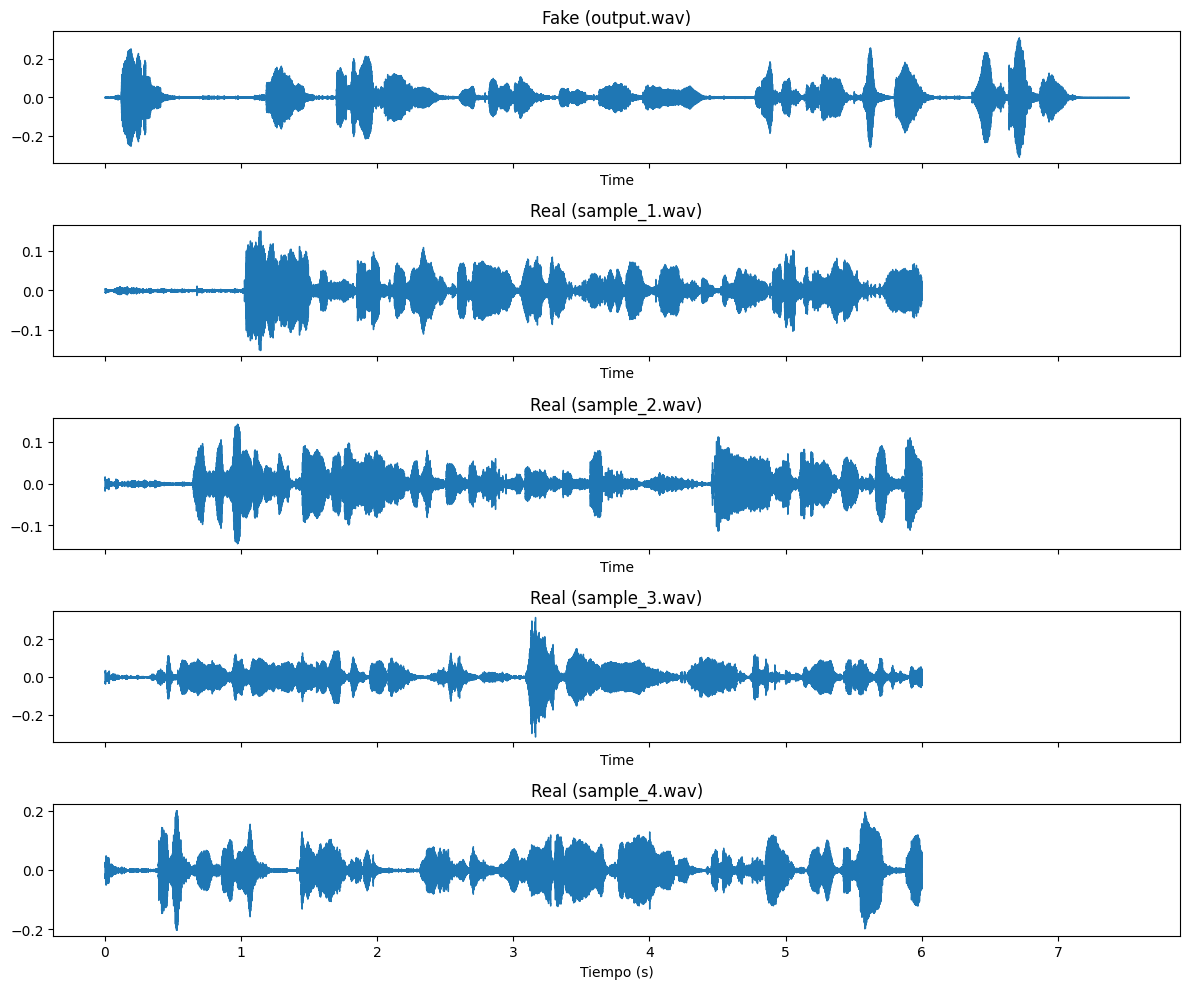

In [ ]:

import matplotlib.pyplot as plt
import librosa.display
# Cargar señal falsa
audio_signal, sampling_rate = librosa.load(filename_fake, sr=None)


# Cargar señal real
audio_signal_real_1, sampling_rate_real_1 = librosa.load(filename_real_sample_1, sr=None)
audio_signal_real_2, sampling_rate_real_2 = librosa.load(filename_real_sample_2, sr=None)
audio_signal_real_3, sampling_rate_real_3 = librosa.load(filename_real_sample_3, sr=None)
audio_signal_real_4, sampling_rate_real_4 = librosa.load(filename_real_sample_4, sr=None)
# Visualizar las señales


fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
librosa.display.waveshow(audio_signal, sr=sampling_rate, ax=axs[0])
axs[0].set_title("Fake (output.wav)")
librosa.display.waveshow(audio_signal_real_1, sr=sampling_rate_real_1, ax=axs[1])
axs[1].set_title("Real (sample_1.wav)")
librosa.display.waveshow(audio_signal_real_2, sr=sampling_rate_real_2, ax=axs[2])
axs[2].set_title("Real (sample_2.wav)")
librosa.display.waveshow(audio_signal_real_3, sr=sampling_rate_real_3, ax=axs[3])
axs[3].set_title("Real (sample_3.wav)")
librosa.display.waveshow(audio_signal_real_4, sr=sampling_rate_real_4, ax=axs[4])
axs[4].set_title("Real (sample_4.wav)")
axs[4].set_xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()